In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
           

In [14]:
zoo = pd.read_csv("Zoo (1).csv")


In [15]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [16]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [17]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [18]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<Axes: xlabel='type', ylabel='count'>

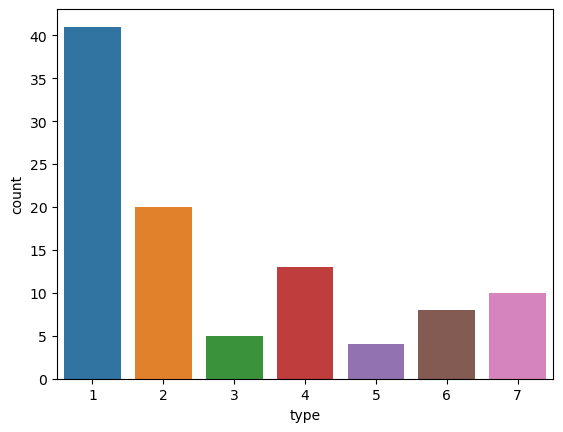

In [19]:
sns.countplot(x = "type", data=zoo)

In [20]:
#check how many animal are domestic

[]

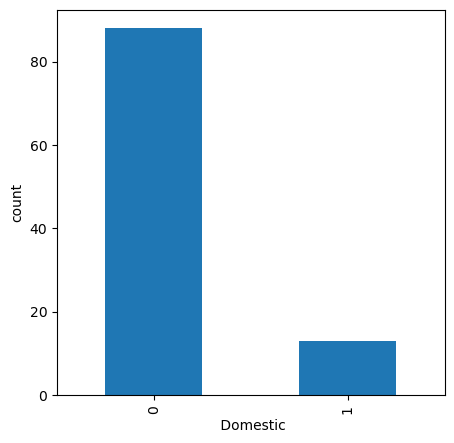

In [21]:
plt.figure(figsize=(5,5))
zoo.domestic.value_counts().plot(kind="bar")
plt.xlabel(" Domestic")
plt.ylabel("count")
plt.plot()

In [22]:
pd.crosstab(zoo.type,zoo.domestic)

domestic,0,1
type,,
1,33,8
2,17,3
3,5,0
4,12,1
5,4,0
6,7,1
7,10,0


In [23]:
# domestic or non Domestic animal

[]

<Figure size 500x500 with 0 Axes>

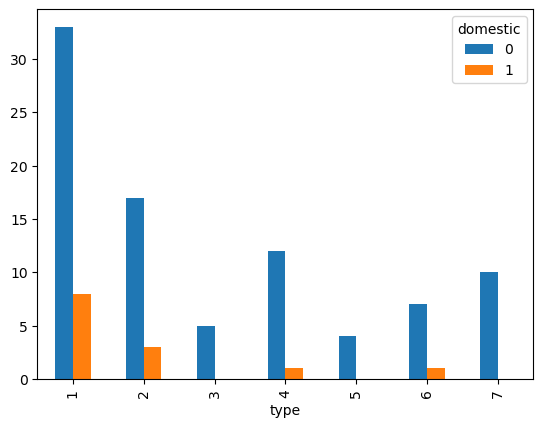

In [24]:
plt.figure(figsize=(5,5))
pd.crosstab(zoo.type,zoo.domestic).plot(kind ="bar")
title=("Domestic And Non-Domestic")
plt.plot()


In [25]:
zoo.milk.value_counts()

0    60
1    41
Name: milk, dtype: int64

In [26]:
zoo.corr()

C:\Users\pprat\AppData\Local\Temp\ipykernel_28580\2190556807.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  zoo.corr()


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


C:\Users\pprat\AppData\Local\Temp\ipykernel_28580\2924381558.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(zoo.corr(),cmap='magma', annot=True, fmt='.3f')


<Axes: >

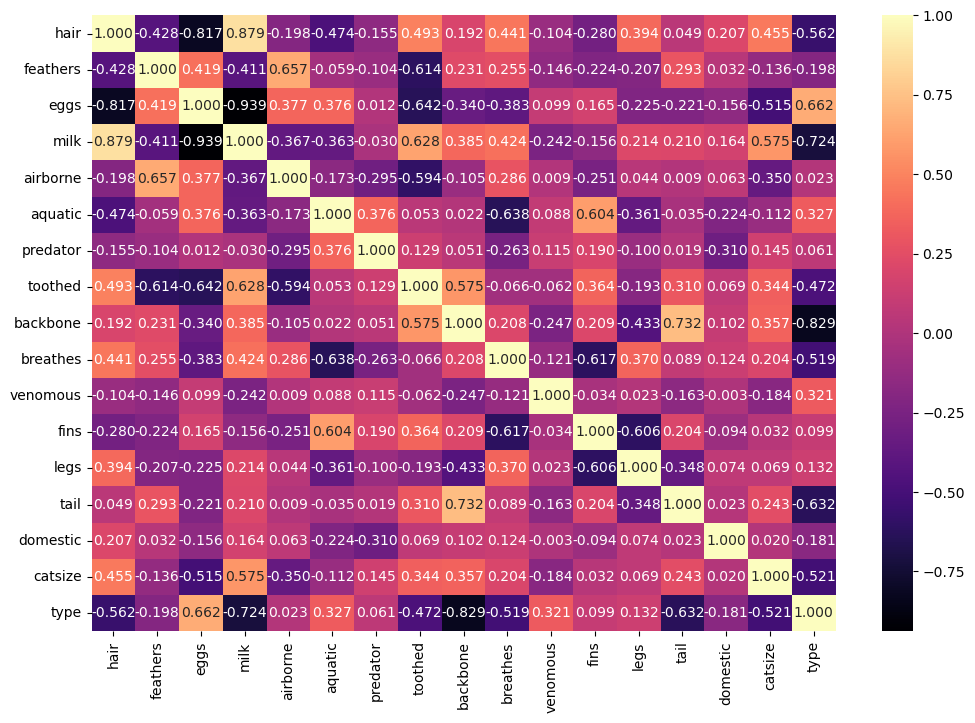

In [27]:
plt.figure(figsize=(12,8));
sns.heatmap(zoo.corr(),cmap='magma', annot=True, fmt='.3f')


In [28]:
#model building

In [29]:
x = zoo.iloc[:,1:15]
y = zoo.iloc[:,-1]
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [30]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [31]:
model = KNeighborsClassifier(n_neighbors = 15)
model.fit(x,y)


KNeighborsClassifier(n_neighbors=15)

In [32]:
n_neighbors = list(range(1,40))
parameter={'n_neighbors':n_neighbors}

In [33]:
model =KNeighborsClassifier()
grid = GridSearchCV(estimator = model,param_grid=parameter)
grid.fit(x,y)

C:\python\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]})

In [34]:
k_range = range(1,35)
k_scores = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x,y, cv=4)
    k_scores.append(scores.mean())

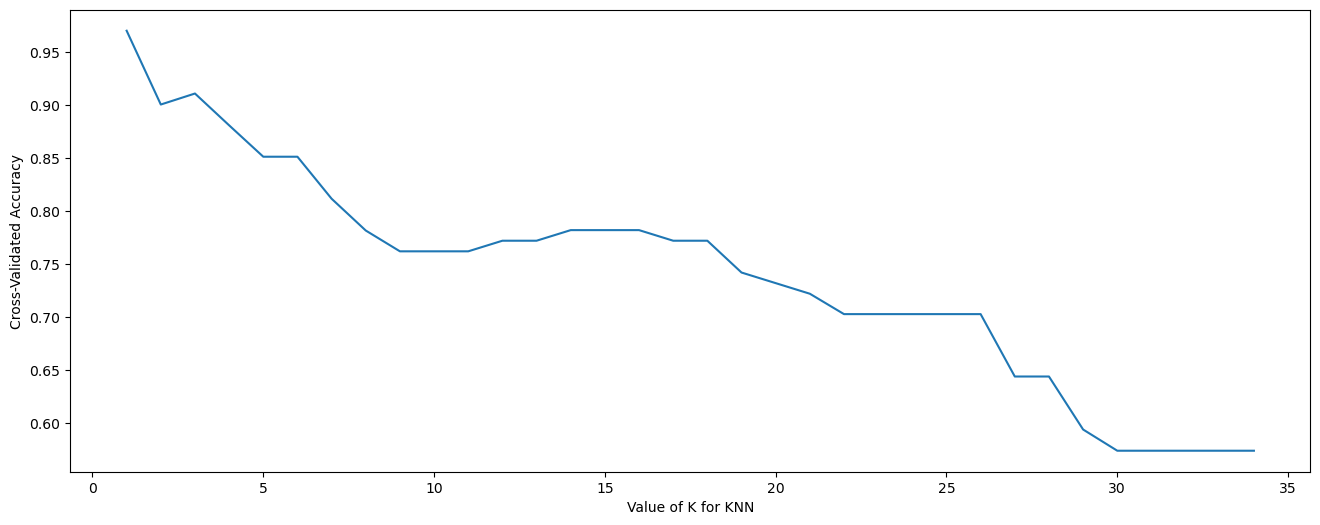

In [35]:
plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [36]:
k_scores


[0.9703846153846154,
 0.9007692307692308,
 0.9111538461538461,
 0.8811538461538461,
 0.8515384615384615,
 0.8515384615384615,
 0.811923076923077,
 0.7819230769230769,
 0.7623076923076924,
 0.7623076923076924,
 0.7623076923076924,
 0.7723076923076924,
 0.7723076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7823076923076924,
 0.7723076923076924,
 0.7723076923076924,
 0.7423076923076923,
 0.7323076923076923,
 0.7223076923076924,
 0.7030769230769232,
 0.7030769230769232,
 0.7030769230769232,
 0.7030769230769232,
 0.7030769230769232,
 0.6442307692307693,
 0.6442307692307693,
 0.5942307692307692,
 0.5742307692307692,
 0.5742307692307692,
 0.5742307692307692,
 0.5742307692307692,
 0.5742307692307692]

In [37]:
zoo_accuracy = pd.DataFrame({'Value of k' : range(1,35),'Accuracy' : k_scores})

In [38]:
zoo_accuracy

,Value of k,Accuracy
0,1,0.970385
1,2,0.900769
2,3,0.911154
3,4,0.881154
4,5,0.851538
5,6,0.851538
6,7,0.811923
7,8,0.781923
8,9,0.762308
9,10,0.762308


In [39]:
zoo_accuracy.sort_values('Accuracy', ascending = False)


,Value of k,Accuracy
0,1,0.970385
2,3,0.911154
1,2,0.900769
3,4,0.881154
4,5,0.851538
5,6,0.851538
6,7,0.811923
13,14,0.782308
15,16,0.782308
14,15,0.782308
